#EN3150 Assignment 03: Simple convolutional neural network to perform classification.



##1 .CNN for image classification

### Mount the google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load the Dataset

In [2]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm  # Progress bar to monitor the copying process

# Define the base directory and the new directories for train, validation, and test sets
base_dir = '/content/drive/My Drive/EN3150-Assignment-03-CNN/Images/'
train_dir = '/content/drive/My Drive/EN3150-Assignment-03-CNN/Images/train'
validation_dir = '/content/drive/My Drive/EN3150-Assignment-03-CNN/Images/validation'
test_dir = '/content/drive/My Drive/EN3150-Assignment-03-CNN/Images/test'

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Lists to hold image data and labels
image_paths = []
labels = []

# Load images from each folder (H1, H2, H3, H5, H6)
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            if filename.endswith('.jpg'):
                # Construct full image path
                image_path = os.path.join(folder_path, filename)
                image_paths.append(image_path)
                labels.append(folder)  # Assign label based on folder name

# Convert labels to a NumPy array
labels = np.array(labels)

### Split the Dataset

In [ ]:
# Split data: 60% train, 20% validation, 20% test
train_paths, temp_paths, train_labels, temp_labels = train_test_split(
    image_paths, labels, test_size=0.4, random_state=42, stratify=labels
)
validation_paths, test_paths, validation_labels, test_labels = train_test_split(
    temp_paths, temp_labels, test_size=0.5, random_state=42, stratify=temp_labels
)

# Print the sizes of the splits
print(f'Training set: {len(train_paths)} images')
print(f'Validation set: {len(validation_paths)} images')
print(f'Test set: {len(test_paths)} images')

# Function to copy images to the relevant directories (train, validation, test)
def copy_images_to_directories(image_paths, labels, split_dir):
    # Create subdirectories for each class in the split directory (train, validation, test)
    for class_name in np.unique(labels):
        os.makedirs(os.path.join(split_dir, class_name), exist_ok=True)

    # Use tqdm to show progress while copying files
    for image_path, label in tqdm(zip(image_paths, labels), total=len(image_paths)):
        # Determine the class directory for the label
        class_dir = os.path.join(split_dir, label)
        # Copy the image to the appropriate class directory
        shutil.copy(image_path, class_dir)

# Copy images to the train, validation, and test directories
print("Copying images to the train directory...")
copy_images_to_directories(train_paths, train_labels, train_dir)

print("Copying images to the validation directory...")
copy_images_to_directories(validation_paths, validation_labels, validation_dir)

print("Copying images to the test directory...")
copy_images_to_directories(test_paths, test_labels, test_dir)

print("Images have been copied to train, validation, and test directories.")


Training set: 5468 images
Validation set: 1823 images
Test set: 1823 images
Copying images to the train directory...


100%|██████████| 5468/5468 [14:18<00:00,  6.37it/s]


Copying images to the validation directory...


100%|██████████| 1823/1823 [04:19<00:00,  7.03it/s]


Copying images to the test directory...


100%|██████████| 1823/1823 [04:21<00:00,  6.98it/s]

Images have been copied to train, validation, and test directories.


### Build the CNN Model with modifications

In [4]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Define the CNN architecture
def build_cnn(input_shape,x1, m1, x2, m2, x3, x4, m3, d, num_classes):
    model = models.Sequential(name="Custom_CNN_Model")

    # Use Input layer to define the input shape
    model.add(layers.Input(shape=input_shape, name='Input'))

    # First Convolutional Layer
    model.add(layers.Conv2D(x1, (m1, m1), activation='relu', name='Conv2D_1'))
    model.add(layers.MaxPooling2D((2, 2), name='MaxPooling2D_1'))

    # Second Convolutional Layer
    model.add(layers.Conv2D(x2, (m2, m2), activation='relu', name='Conv2D_2'))
    model.add(layers.MaxPooling2D((2, 2), name='MaxPooling2D_2'))

    # Third Convolutional Layer
    model.add(layers.Conv2D(x4, (m3, m3), activation='relu', name='Conv2D_3'))
    model.add(layers.MaxPooling2D((2, 2), name='MaxPooling2D_3'))

    # Fourth Convolutional layer
    model.add(layers.Conv2D(x4, (m3, m3), activation='relu', name='Conv2D_4'))
    model.add(layers.MaxPooling2D((2, 2), name='MaxPooling2D_4'))

    # Flatten the output
    model.add(layers.Flatten(name='Flatten'))

    # Fully Connected Layer
    model.add(layers.Dense(x3, activation='relu', name='Dense_1'))
    model.add(layers.Dropout(d, name='Dropout_1'))  # Dropout layer to reduce overfitting

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax', name='Output'))

    return model

# Build and compile the CNN model
input_shape = (224,224, 3)
cnn_model = build_cnn(input_shape,x1=32, m1=3, x2=64, m2=3, x3=128, x4=64, m3=3, d=0.5, num_classes=5)

# Custom learning rate
custom_lr_optimizer = Adam(learning_rate=0.0001)

# Using the optimizer in the model
cnn_model.compile(optimizer=custom_lr_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
cnn_model.summary()

Model: "Custom_CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv2D_1 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling2D_1 (MaxPooling2D)        │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_2 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling2D_2 (MaxPooling2D)        │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_3 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling2D_3 (MaxPooling2D)        │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_4 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling2D_4 (MaxPooling2D)        │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,273,669 (4.86 MB)

 Trainable params: 1,273,669 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

### Train the Model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
img_size = (224, 224)  # Resize images to 150x150
batch_size = 32

# Create ImageDataGenerators for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize images to [0, 1]
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Use categorical since labels are one-hot encoded
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No shuffling for validation data
)

# Train the model
history = cnn_model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    verbose=1
)



Found 5468 images belonging to 5 classes.
Found 1823 images belonging to 5 classes.
Epoch 1/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 679s 4s/step - accuracy: 0.6877 - loss: 0.7751 - val_accuracy: 0.6687 - val_loss: 0.8161
Epoch 2/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 668s 4s/step - accuracy: 0.6944 - loss: 0.7753 - val_accuracy: 0.6769 - val_loss: 0.8197
Epoch 3/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 658s 4s/step - accuracy: 0.6952 - loss: 0.7600 - val_accuracy: 0.6506 - val_loss: 0.8369
Epoch 4/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 658s 4s/step - accuracy: 0.6994 - loss: 0.7594 - val_accuracy: 0.6643 - val_loss: 0.8273
Epoch 5/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 659s 4s/step - accuracy: 0.7096 - loss: 0.7359 - val_accuracy: 0.6665 - val_loss: 0.8095
Epoch 6/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 702s 4s/step - accuracy: 0.6976 - loss: 0.7300 - val_accuracy: 0.6742 - val_loss: 0.8134
Epoch 7/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 664s 4s/step - accuracy: 0.7154 - loss: 0.7048 - val_accuracy: 0.6577 - val_loss: 0.8388
Epoch 8/20
17

ValueError: The `save_format` argument is deprecated in Keras 3. Please remove this argument and pass a file path with either `.keras` or `.h5` extension.Received: save_format=tf

In [ ]:
import matplotlib.pyplot as plt

# Extract loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extract the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Path to save the model
save_path = '/content/drive/My Drive/models/cnn_model_1.h5'

# Save the model
cnn_model.save(save_path)

# Confirm the model has been saved
print("Model saved successfully!")


In [ ]:
from tensorflow.keras.models import load_model

# Path to the saved model
save_path = '/content/drive/My Drive/models/cnn_model_1.h5'

# Load the model
cnn_model = load_model(save_path)

# Confirm the model has been loaded
print("Model loaded successfully!")


Model loaded successfully!


### Evaluate the model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

# Parameters

img_size = (224, 224)  # Replace with your model's expected input size
batch_size = 32  # Adjust batch size if needed

# Load the test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No shuffling to preserve order
)


Found 1823 images belonging to 5 classes.


In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = cnn_model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 257s 5s/step - accuracy: 0.7827 - loss: 0.5674
Test Accuracy: 0.67


57/57 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step
Confusion Matrix:
[[774  81  24   1   1]
 [273 140  28   9  17]
 [ 55  26  57  13  13]
 [ 11  12  10 123   8]
 [  6   3   7   4 127]]


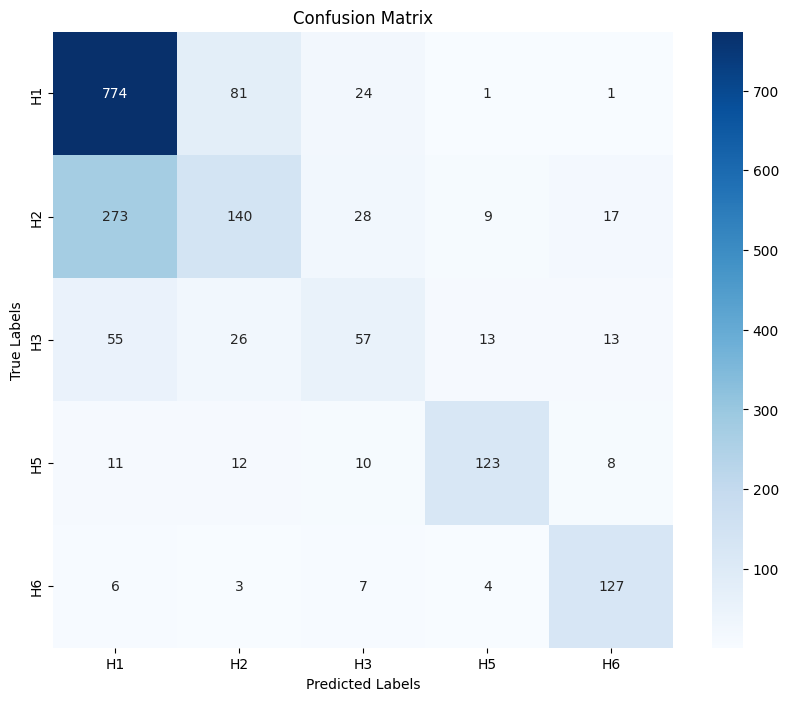

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels and predictions
true_labels = test_generator.classes
predictions = cnn_model.predict(test_generator, verbose=1)
predicted_labels = np.argmax(predictions, axis=1)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Classification report
report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

          H1       0.69      0.88      0.77       881
          H2       0.53      0.30      0.38       467
          H3       0.45      0.35      0.39       164
          H5       0.82      0.75      0.78       164
          H6       0.77      0.86      0.81       147

    accuracy                           0.67      1823
   macro avg       0.65      0.63      0.63      1823
weighted avg       0.65      0.67      0.64      1823



### Plot training and validation loss

Training with learning rate: 0.0001
Found 2691 images belonging to 5 classes.
Found 1765 images belonging to 5 classes.
Epoch 1/10
85/85 [==============================] - 1383s 16s/step - loss: 1.5274 - accuracy: 0.3679 - val_loss: 1.5852 - val_accuracy: 0.3076
Epoch 2/10
85/85 [==============================] - 204s 2s/step - loss: 1.3550 - accuracy: 0.4697 - val_loss: 1.3645 - val_accuracy: 0.3382
Epoch 3/10
85/85 [==============================] - 202s 2s/step - loss: 1.2507 - accuracy: 0.4931 - val_loss: 1.3259 - val_accuracy: 0.3422
Epoch 4/10
85/85 [==============================] - 203s 2s/step - loss: 1.2063 - accuracy: 0.5262 - val_loss: 1.3225 - val_accuracy: 0.3592
Epoch 5/10
85/85 [==============================] - 204s 2s/step - loss: 1.1943 - accuracy: 0.5262 - val_loss: 1.3076 - val_accuracy: 0.3484
Epoch 6/10
85/85 [==============================] - 204s 2s/step - loss: 1.1423 - accuracy: 0.5500 - val_loss: 1.1494 - val_accuracy: 0.3632
Epoch 7/10
85/85 [==============

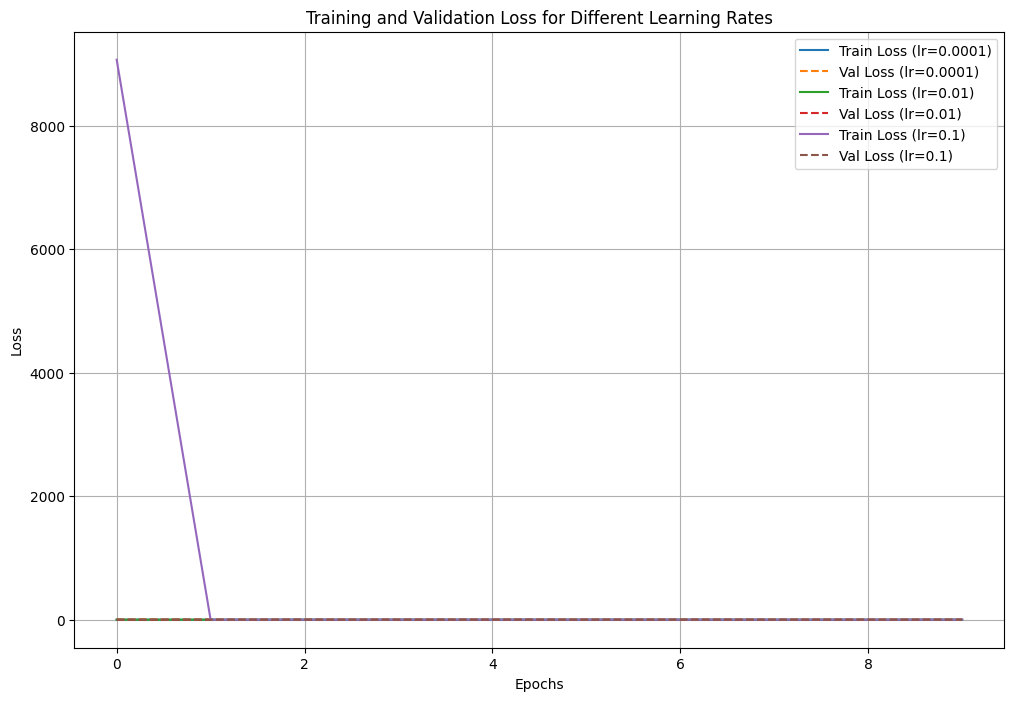

In [ ]:
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Learning rates to experiment with
learning_rates = [0.0001, 0.01, 0.1]

# Dictionary to store training histories for each learning rate
histories = {}

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")

    # Build and compile the model with the given learning rate
    cnn_model = build_cnn(input_shape=(224, 224, 3), x1=32, m1=3, x2=64, m2=3, x3=128, x4=64, m3=3, d=0.5, num_classes=5)
    cnn_model.compile(optimizer=Adam(learning_rate=lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Define image size and batch size
    img_size = (224, 224)  # Resize images to 150x150
    batch_size = 32

    # Create ImageDataGenerators for training, validation, and test sets
    train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize images to [0, 1]
    validation_datagen = ImageDataGenerator(rescale=1./255)

    # Load data from directories
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',  # Use categorical since labels are one-hot encoded
        shuffle=True
    )

    validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False  # No shuffling for validation data
    )

    # Train the model and store history
    history = cnn_model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
        verbose=1
    )

    histories[lr] = history


# Plot training and validation loss
plt.figure(figsize=(12, 8))

for lr, history in histories.items():
    plt.plot(history.history['loss'], label=f'Train Loss (lr={lr})')
    plt.plot(history.history['val_loss'], linestyle='--', label=f'Val Loss (lr={lr})')

plt.title('Training and Validation Loss for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

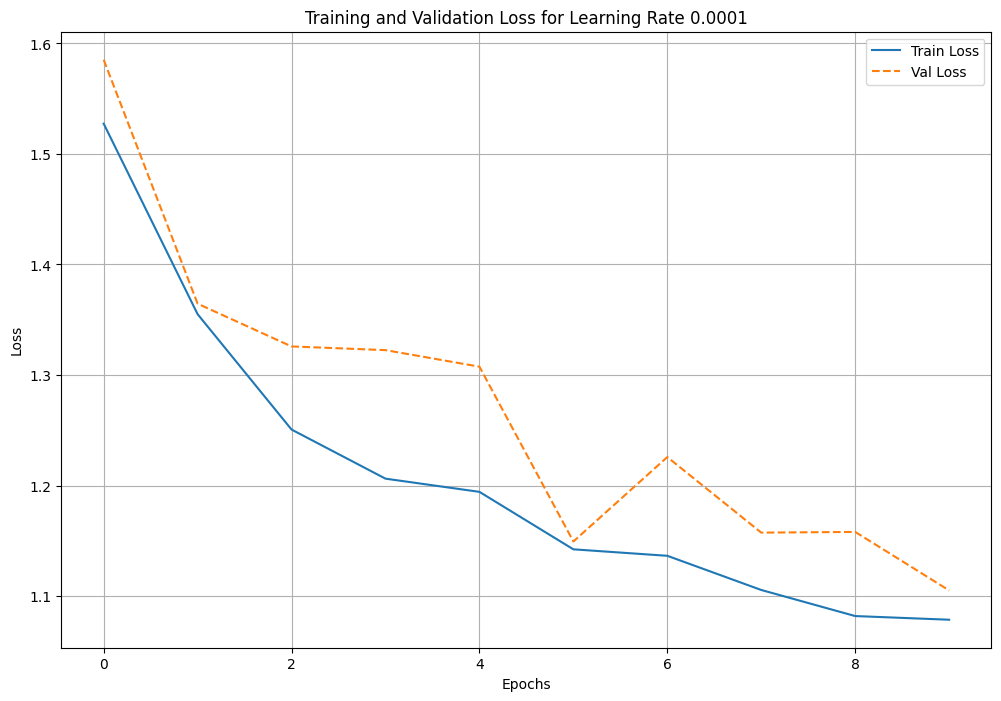

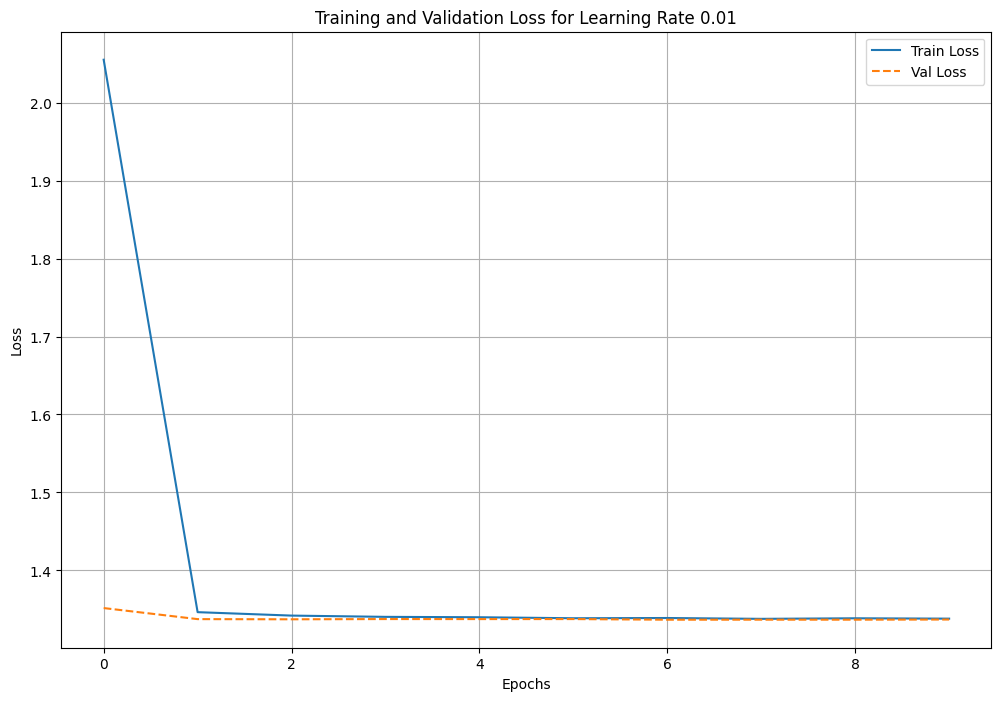

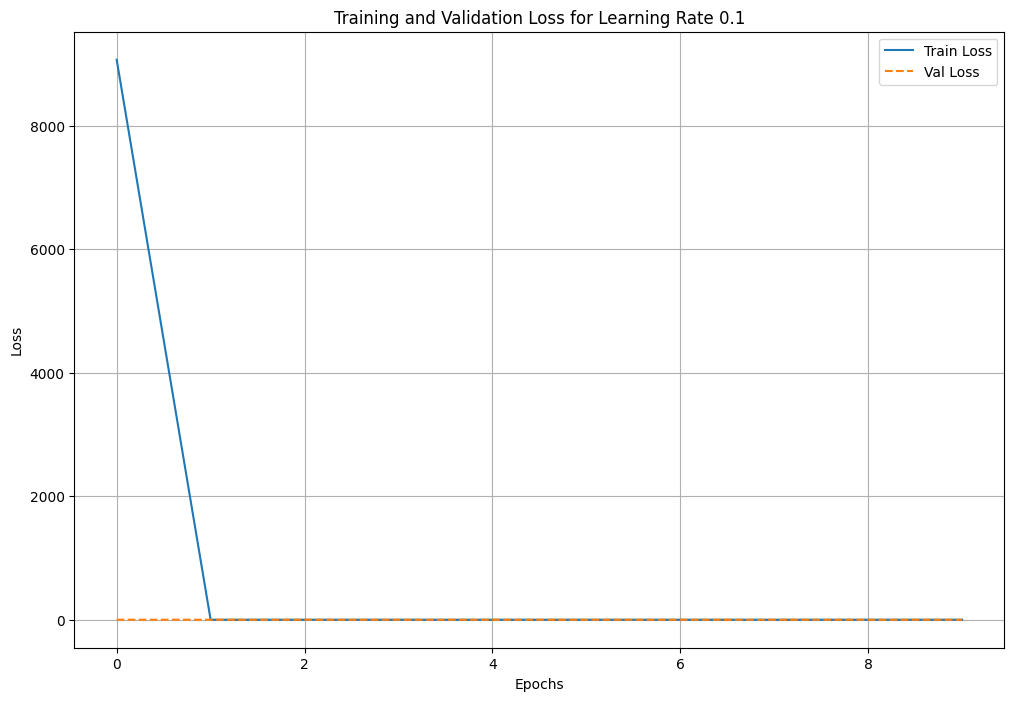

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss for each learning rate in separate plots
for lr, history in histories.items():
    plt.figure(figsize=(12, 8))

    # Plot training and validation loss
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], linestyle='--', label='Val Loss')

    # Customize plot
    plt.title(f'Training and Validation Loss for Learning Rate {lr}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()


In [ ]:
import os

# Directory to save models
save_dir = "/content/drive/My Drive/models/saved_models"
os.makedirs(save_dir, exist_ok=True)  # Create directory if it doesn't exist

for lr, history in histories.items():
    # Filepath for each model
    model_path = os.path.join(save_dir, f"cnn_model_lr_{lr}.h5")

    # Save the model
    cnn_model.save(model_path)
    print(f"Model with learning rate {lr} saved to {model_path}")


Model with learning rate 0.0001 saved to /content/drive/My Drive/models/saved_models/cnn_model_lr_0.0001.h5
Model with learning rate 0.01 saved to /content/drive/My Drive/models/saved_models/cnn_model_lr_0.01.h5
Model with learning rate 0.1 saved to /content/drive/My Drive/models/saved_models/cnn_model_lr_0.1.h5
